In [1]:
using Plots
using DelimitedFiles
using LaTeXStrings

include("TN_Superfermionic_Mesoscopic_Leads/Code/Interacting_functions.jl")

This package is totally compatible with gpu. If you want to use GPU, just define GPU = true as a global variable in your code.


Energy_Current_HS_time_dependent

In [3]:
precompile_package("TN_Superfermionic_Mesoscopic_Leads")

The package has been precompiled for GPU = false.
  4.585658 seconds (13.10 M allocations: 3.728 GiB, 4.59% gc time, 0.38% compilation time)


In [6]:
D = 4
R_dict = Dict()

for Current = ["JE", "JP"]
    R_values = []
    for E = 0:0.2:4.8
        # for D = [4]

            E = Float64(E)
            D = Int64(D)

            L = 10

            # Folder = "/jet/home/penuelap/Heat_rectification_Data/" #PSC
            Folder = "Local_Data/Heat_rectification_Data/" #MSI

            Name = "_E=$E"*"_L=$L"*"_D=$D"

            J_F = readdlm(Folder*"Forward"*Name*"_NESS_$Current.txt")
            J_R = readdlm(Folder*"Reverse"*Name*"_NESS_$Current.txt")
            time = readdlm(Folder*"Reverse"*Name*"_NESS_time.txt")

            # Generate plots

            # plot(time, J_R, color = "blue", label = "Reverse")
            # plot!(time, J_F, color = "red", label = "Forward")
            # hline!([0], linestyle = :dash, color = "gray", label = false, alpha = 0.5)
            # Ratio = round.((J_F[end]/J_R[end]); digits=3)
            # title!("E=$E"*", L=$L"*", D=$D")
            # Current == "JE" ? ylabel!("Energy Current "*L"J_{E}") : ylabel!("Particle Current "*L"J_{P}")
            # Current == "JE" ? annotate!(time[end]/2, 0.0 , L"J_{E}^{F}/J_{E}^{R} = "*"$Ratio") : annotate!(time[end]/2, 0.0 , L"J_{P}^{F}/J_{P}^{R} = "*"$Ratio")
            # xlims!(40, 50)
            # ylims!(-0.2, 0.2)
            # Current == "JE" ? annotate!(45.0, 0.0 , L"J_{E}^{F}/J_{E}^{R} = "*"$Ratio") : annotate!(45.0, 0.0 , L"J_{P}^{F}/J_{P}^{R} = "*"$Ratio")
            
            # savefig(Folder*"Results"*Name*"_$Current.pdf")

            #Save rectification coefficient into a dict to save it.
            abs(J_F[end]) > abs(J_R[end]) ? R = abs(J_F[end]/J_R[end]) : R = abs(J_R[end]/J_F[end])
            append!(R_values, R)            
        # end
    end
    R_dict[Current] = R_values

end

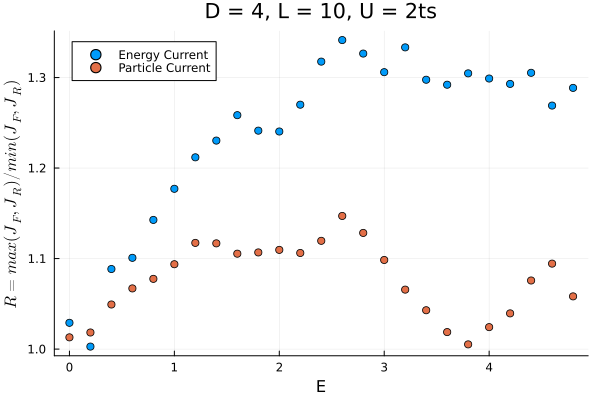

In [7]:
scatter(0:0.2:4.8, R_dict["JE"], xlabel = "E", ylabel = L"R = max(J_{F}, J_{R})/min(J_{F}, J_{R})", label = "Energy Current")
scatter!(0:0.2:4.8, R_dict["JP"], xlabel = "E", ylabel = L"R = max(J_{F}, J_{R})/min(J_{F}, J_{R})", label = "Particle Current")
title!("D = $D, L = 10, U = 2ts")

In [33]:
Occupations_F = Dict()
Occupations_R = Dict()

for E = 0:0.2:4.8

    L = 10
    # Folder = "/jet/home/penuelap/Heat_rectification_Data/" #PSC
    Folder = "Local_Data/Heat_rectification_Data/" #MSI
    Name = "_E=$E"*"_L=$L"*"_D=$D"    

    begin @time for direction = ["Forward", "Reverse"]

        f = h5open(Folder*direction*Name*"_NESS_MPS.h5")
        NESS = read(f,"MPS", MPS)
        close(f)
        
        sites = siteinds(NESS)
        I_vec = Build_left_vacuum(sites)
        direction == "Forward" ? Occupations_F[E] = Occupations_per_site(NESS, I_vec) : Occupations_R[E] = Occupations_per_site(NESS, I_vec)
    end
    end
    println("E = $E occupation calculation has finished")
end

  9.195295 seconds (1.49 M allocations: 4.413 GiB, 8.32% gc time)
E = 0.0 occupation calculation has finished
  8.077772 seconds (1.49 M allocations: 4.418 GiB, 2.30% gc time)
E = 0.2 occupation calculation has finished
  7.466091 seconds (1.49 M allocations: 4.420 GiB, 2.30% gc time)
E = 0.4 occupation calculation has finished
  8.274266 seconds (1.49 M allocations: 4.423 GiB, 2.42% gc time)
E = 0.6 occupation calculation has finished
  7.850500 seconds (1.49 M allocations: 4.430 GiB, 2.55% gc time)
E = 0.8 occupation calculation has finished
  8.253721 seconds (1.49 M allocations: 4.435 GiB, 2.58% gc time)
E = 1.0 occupation calculation has finished
 10.224957 seconds (1.49 M allocations: 4.440 GiB, 2.61% gc time)
E = 1.2 occupation calculation has finished
  9.207809 seconds (1.49 M allocations: 4.446 GiB, 13.62% gc time)
E = 1.4 occupation calculation has finished
  8.974616 seconds (1.49 M allocations: 4.453 GiB, 2.15% gc time)
E = 1.6 occupation calculation has finished
  8.39132

In [41]:
# plot()
for E = 0:0.2:4.8

    L, D, R = 10, 4, 10
    
    scatter(1:1:L, Occupations_R[E][1:L], label = "L")
    scatter!(L+1:1:L+D, Occupations_R[E][L+1:L+D], label = "S")
    scatter!(L+D+1:1:L+D+R, Occupations_R[E][L+D+1:L+D+R], label = "R")

    title!("E = $E")
    xlabel!("Physical site i")
    ylabel!(L"\langle N_{i} \rangle")
    
    savefig("Results - U=2.5ts/Occupation E = $E .png")
end